# Applied Machine Learning: Module 2 (Supervised Learning, Part I)

In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_regression
from scipy import stats
from sklearn.preprocessing import MinMaxScaler #importing the scaler method
from sklearn.datasets import make_friedman1

base_dir = os.path.join('',Path(os.getcwd()).parents[0])
data_dir = os.path.join(base_dir, 'Data')

### Preamble: The K-NN Classifier

In [2]:
fruits = pd.read_table(data_dir+'/fruit_data_with_colors.txt')
fruits_columns = ['mass', 'width', 'height','color_score']
X_fruits = fruits[fruits_columns]
y_fruits = fruits['fruit_label']
target_names_fruits = list(fruits['fruit_name'].unique())

X_train, X_test, y_train, y_test = train_test_split(X_fruits, y_fruits, random_state=0)


scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

example_fruit = [[5.5,2.2,10,0.7]]
example_fruit_scaled = scaler.transform(example_fruit)
print('Predicted fruit type for ', example_fruit, ' is ', 
          target_names_fruits[knn.predict(example_fruit)[0]-1])

Accuracy of K-NN classifier on training set: 0.80
Accuracy of K-NN classifier on test set: 0.53
Predicted fruit type for  [[5.5, 2.2, 10, 0.7]]  is  mandarin


C:\Users\aleex\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\aleex\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [3]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
# we must apply the scaling to the test set that we computed for the training set
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_scaled, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train_scaled, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test_scaled, y_test)))

example_fruit = [[5.5, 2.2, 10, 0.70]]
example_fruit_scaled = scaler.transform(example_fruit)
print('Predicted fruit type for ', example_fruit, ' is ', 
          target_names_fruits[knn.predict(example_fruit_scaled)[0]-1])

Accuracy of K-NN classifier on training set: 0.95
Accuracy of K-NN classifier on test set: 1.00
Predicted fruit type for  [[5.5, 2.2, 10, 0.7]]  is  lemon


C:\Users\aleex\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


### Datasets

**Simple Regression Dataset - make_regression()** 

<IPython.core.display.Javascript object>


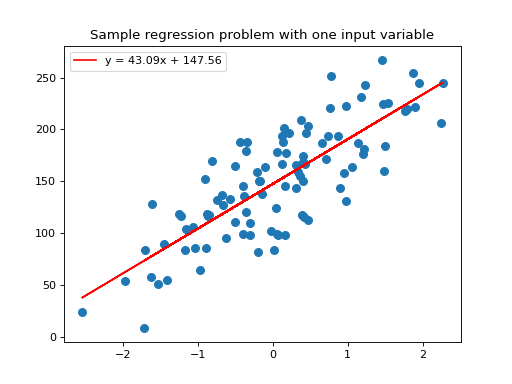

           x           y
0  -0.359553  120.612028
1   0.976639  131.228641
2   0.402342  150.563777
3  -0.813146  169.905024
4  -0.887786  118.156579
..       ...         ...
95 -1.165150  103.444564
96 -0.362741  179.346690
97  0.356366  155.143858
98 -1.613898  128.517202
99 -1.180632   83.823290

[100 rows x 2 columns]


In [4]:
# synthetic dataset for simple regression

plt.figure()
plt.title('Sample regression problem with one input variable')
X_R1, y_R1 = make_regression (n_samples = 100, n_features = 1, n_informative =1, bias=150.0, noise = 30, random_state =0) # random regression, given parameters
plt.scatter(X_R1,y_R1, marker = 'o', s=50)

data= pd.DataFrame(data = X_R1, columns =['x'])
data ['y'] = pd.DataFrame(data = y_R1, columns =['y'])
b, a, r_value, p_value, std_err = stats.linregress(x=data['x'],y=data['y'])
line_reg = [b*i + a for i in data.x]
reg = 'y = {}x + {}'

plt.plot(data.x,line_reg, 'r', label=reg.format(b.round(2),a.round(2)))
plt.legend()
plt.show()
print(data)

C:\Users\aleex\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<IPython.core.display.Javascript object>


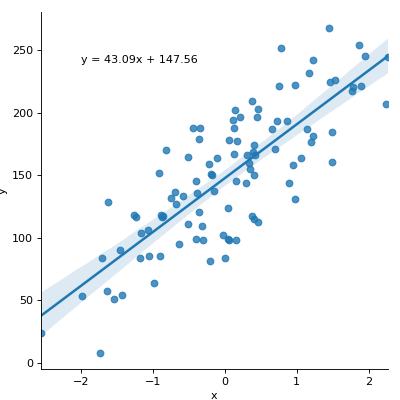

Text(-2, 240, 'y = 43.09x + 147.56')

In [5]:
#or
sns.lmplot('x', 'y', data)
sns.despine()
plt.annotate(reg.format(b.round(2),a.round(2)),(-2,240))

**Polynomial Regression Dataset - make_friedman1()** 

<IPython.core.display.Javascript object>


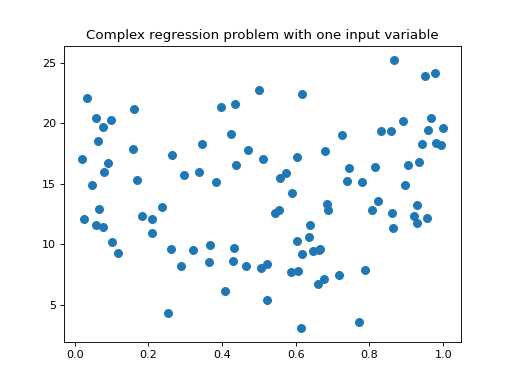

In [6]:
# synthetic dataset for more complex regression

plt.figure()
plt.title('Complex regression problem with one input variable')
X_F1, y_F1 = make_friedman1(n_samples = 100,
                           n_features = 7, random_state=0)

plt.scatter(X_F1[:, 2], y_F1, marker= 'o', s=50)
plt.show()

**Binary classification Dataset - make_classification()**

<IPython.core.display.Javascript object>


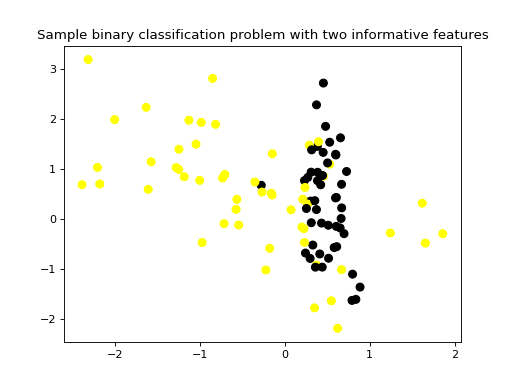

In [7]:
from sklearn.datasets import make_classification
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])
plt.figure()
plt.title('Sample binary classification problem with two informative features')
X_C2, y_C2 = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)
plt.scatter(X_C2[:, 0], X_C2[:, -1], c=y_C2,
           marker= 'o', s=50, cmap=cmap_bold)
plt.show();

In [8]:
print(X_C2[:5])
print(y_C2[:20])

[[ 0.37163989 -0.92276158]
 [-0.1617182   0.51386743]
 [-1.63650855  2.23389996]
 [ 0.62041909 -2.18941375]
 [-0.98718544  1.93299453]]
[0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 1 1 1 1]


** Complex Binary classification Dataset - make_blobs()**

<IPython.core.display.Javascript object>


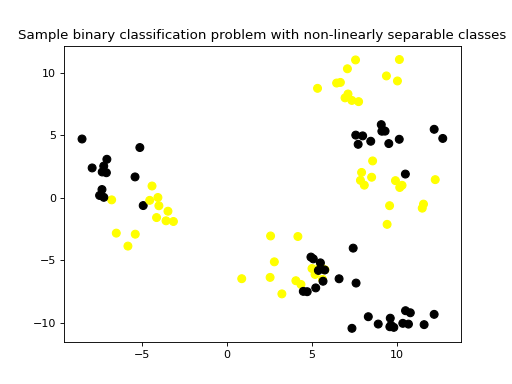

In [9]:
from sklearn.datasets import make_blobs

X_D2, y_D2 = make_blobs(n_samples = 100, n_features = 2, centers = 8,
                       cluster_std = 1.3, random_state = 4)
y_D2 = y_D2 % 2
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker= 'o', s=50, cmap=cmap_bold)
plt.show()

**Importing some datasets for future work**

In [10]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(cancer.keys())
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)
X_cancer

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [11]:
from adspy_shared_utilities import load_crime_dataset

(X_crime, y_crime) = load_crime_dataset()
X_crime.communityname.unique().shape[0]

FileNotFoundError: [Errno 2] No such file or directory: 'readonly/CommViolPredUnnormalizedData.txt'

## K-Nearest Neighbors

### In Classification

Comparing the accuracy and suitability of the classifier depending on the k for both train and test datasets at the same time. We'll evaluate the score of the classifier for both datasets in order to figure out the most suitable k for the model.

In [ ]:
from adspy_shared_utilities import plot_two_class_knn

X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2,random_state=0)

plot_two_class_knn(X_train, y_train, 1, 'uniform', X_test, y_test) # k=1
plot_two_class_knn(X_train, y_train, 3, 'uniform', X_test, y_test) # k=3
plot_two_class_knn(X_train, y_train, 11, 'uniform', X_test, y_test) # k=11
plot_two_class_knn(X_train, y_train, 20, 'uniform', X_test, y_test) # k=20

*In the k = 1 case, the training score is a perfect 1.0. But the test score is only 0.80. As k increases to 3, the training score drops to 0.88 but the test score rises slightly 2.88, indicating the model is generalizing better to new data. When k = 11, the training score drops a bit further to 0.81, but the test score even better at 0.92, indicating that this simple model is much more effective at ignoring minor variations in training data. And instead capturing the more important global trend in where the classes tend to be located with the best overall generalization performance as a result*

### In Regression - KNeighborsRegressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1, random_state = 0)
knnreg = KNeighborsRegressor(n_neighbors = 5)
knnreg = knnreg.fit(X_train, y_train)
print(knnreg.predict(X_test))
print('R-squared test score: {:.3f}'
     .format(knnreg.score(X_test, y_test)))
print('R-squared train score: {:.3f}'
     .format(knnreg.score(X_train, y_train)))

In [ ]:
knnreg5 = KNeighborsRegressor(n_neighbors = 5).fit(X_train, y_train)
print('R-squared test score for k=5: {:.3f}'
     .format(knnreg5.score(X_test, y_test)))

knnreg1 = KNeighborsRegressor(n_neighbors = 1).fit(X_train, y_train)
print('R-squared test score for k=1: {:.3f}'
     .format(knnreg1.score(X_test, y_test)))

knnreg15 = KNeighborsRegressor(n_neighbors = 15).fit(X_train, y_train)
print('R-squared test score for k=15: {:.3f}'
     .format(knnreg15.score(X_test, y_test)))

knnreg55 = KNeighborsRegressor(n_neighbors = 55).fit(X_train, y_train)
print('R-squared test score for k=55: {:.3f}'
     .format(knnreg55.score(X_test, y_test)))

**R-Squared test score (coef of determination)** sets how well the regression model is able to fit to real data. In this case, with k=5 is RSQ=0.425. The nearer to 1 the better the prediction would be. It will be better for k=15

In [ ]:
# Plotting the accuracy of the prediction in training sets with k=1 and k=3

fig, subaxes = plt.subplots(1, 2, figsize=(8,4))
X_predict_input = np.linspace(-3, 3, 50).reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X_R1[0::5], y_R1[0::5], random_state = 0)

for thisaxis, K in zip(subaxes, [1, 3]):
    knnreg = KNeighborsRegressor(n_neighbors = K).fit(X_train, y_train)
    y_predict_output = knnreg.predict(X_predict_input)
    thisaxis.set_xlim([-2.5, 0.75])
    thisaxis.plot(X_predict_input, y_predict_output, '^', markersize = 10,
                 label='Predicted', alpha=0.8)
    thisaxis.plot(X_train, y_train, 'o', label='True Value', alpha=0.8)
    thisaxis.set_xlabel('Input feature')
    thisaxis.set_ylabel('Target value')
    thisaxis.set_title('KNN regression (K={})'.format(K))
    thisaxis.legend()
plt.tight_layout()

** Regression model complexity as a function of K **

In [ ]:
# plot k-NN regression on sample dataset for different values of K
fig, subaxes = plt.subplots(5, 1, figsize=(5,20))
X_predict_input = np.linspace(-3, 3, 500).reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1,
                                                   random_state = 0)

for thisaxis, K in zip(subaxes, [1, 3, 7, 15, 55]):
    knnreg = KNeighborsRegressor(n_neighbors = K).fit(X_train, y_train)
    y_predict_output = knnreg.predict(X_predict_input)
    train_score = knnreg.score(X_train, y_train)
    test_score = knnreg.score(X_test, y_test)
    thisaxis.plot(X_predict_input, y_predict_output)
    thisaxis.plot(X_train, y_train, 'o', alpha=0.9, label='Train')
    thisaxis.plot(X_test, y_test, '^', alpha=0.9, label='Test')
    thisaxis.set_xlabel('Input feature')
    thisaxis.set_ylabel('Target value')
    thisaxis.set_title('KNN Regression (K={})\n\
Train $R^2 = {:.3f}$,  Test $R^2 = {:.3f}$'
                      .format(K, train_score, test_score))
    thisaxis.legend()
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

Just as we did for classification, let's look at the connection between model complexity and generalization ability as measured by the r-squared training and test values on the simple regression dataset. The series of plots on the notebook shows how the KNN regression algorithm fits the data for k = 1, 3, 7, 15, and in an extreme case of k = 55. It represents almost half the training points. We can see the same pattern in model complexity for k and N regression that we saw for k and N classification. Namely, that small values of k give models with higher complexity. And large values of k result in simpler models with lower complexity.

Starting on the left when k = 1, the regression model fits the training data perfectly with a r-squared score of 1.0. But it's very bad at predicting the target values for new data samples, as reflected in the r-squared test score of only 0.155.

As the value of k increases, again the training set score drops, but the model gets better at generalizing to new data and the test score goes up.

Finally in this series, the model with k = 15 has the best test set performance, with an r-squared score of 0.485. Increasing k much further however to k = 55, results in both the training and test set scores dropping back down to lower levels, as the model now starts to under-fit. In other words, it's too simple to do well, even on the training data (Score for train sets is lower than for test sets)

## Linear Regression: Least Squares - linreg = LinearRegression()

In [ ]:
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1, random_state=0)

linreg = LinearRegression().fit(X_train, y_train)
print('linear model coeff (w): {}'.format(linreg.coef_.round(3)))
print('linear model intercept(b): {:.3f}'.format(linreg.intercept_))
print('R-Squared score (training): {:.3f}'.format(linreg.score(X_train, y_train)))
print('R-Squared score (test): {:.3f}'.format(linreg.score(X_test, y_test)))
b = float(linreg.coef_.round(3))
a = linreg.intercept_.round(3)
print('y = {}x + {}'.format(b,a))

### Linear Regression: example plot

In [ ]:
plt.figure(figsize=(5,4))
plt.scatter(X_R1, y_R1, marker='o', s=50, alpha=0.8)
plt.plot(X_R1, linreg.coef_*X_R1 + linreg.intercept_,'r-',c='red', label='y = {}x + {}'.format(b,a))
plt.title('Least-squares linear regression')
plt.xlabel('Feature value (x)')
plt.ylabel('Target value (y)')
plt.legend()
plt.show()

<img src="Captura2.PNG">

**Now on the Load_crime dataset **

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime, random_state = 0)

#linreg = LinearRegression().fit(X_train, y_train)

## Regularized Models: Ridge Regression

Ridge regression uses the same least-squares criterion, but with one difference. During the training phase, it adds a penalty for feature weights, the WI values that are too large as shown in the equation here. You'll see that large weights means mathematically that the sum of their squared values is large. Once ridge regression has estimated the WNB parameters for the linear model, the prediction of Y values for new instances is exactly the same as in least squares

In [ ]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime,
                                                   random_state = 0)

linridge = Ridge(alpha=20.0).fit(X_train, y_train)

print('Crime dataset')
print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test, y_test)))
print('Number of non-zero features: {}'.format(np.sum(linridge.coef_ != 0)))

*But, in order to get this model performing well, feature normalization will be needed, as it would scale all features transforming them to get a more fair estimator. The method to be used is MinMaxScaler(), fitting it to the trainer, which transforms, for any observation variable, the minimum value to 0 and the maximum to 1, doing it for all the variables of the dataset, having all the values of the observation in between 0 and 1. We would have to apply this scalar to the test set*

#### Ridge regression with feature normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linridge = Ridge(alpha=20.0).fit(X_train_scaled, y_train)

print('Crime Dataset Ridge Reg')
print('Ridge regression linear model intercept: {}'.format(linridge.intercept_))
print('Ridge regression linear model coeff: \n {}'.format(linridge.coef_))
print('R-Squared score on training set: {:.3f}'.format(linridge.score(X_train_scaled,y_train)))
print('R-Squared score on test set: {:.3f}'.format(linridge.score(X_test_scaled, y_test)))
print('Number of features taken in account: {}'.format(len(linridge.coef_ != 0)))

As we can see, R-Squared is clearly better in Normalized Ridge Regression than in OLS Linear Regression (0.6 on test set against 0.5 in OLS and 0.5 in Regular Ridge Regression). So Ridge Regression improves results when it's NORMALIZED.

Even though, regularization is not always that optimal. It is when the number of features is relatively large comparing to the size of the training dataset. Either if the size of the training dataset (number of rows/observations) is not that big or if there's not a huge number of features, regularization would not be that effective

**Ridge regression depending on regularization parameter: alpha**

In [ ]:
print('Ridge regression: effect of alpha regularization parameter\n')
for this_alpha in [0, 1, 10, 20, 50, 100, 1000]:
    linridge = Ridge(alpha = this_alpha).fit(X_train_scaled, y_train)
    r2_train = linridge.score(X_train_scaled, y_train)
    r2_test = linridge.score(X_test_scaled, y_test)
    num_coeff_bigger = np.sum(abs(linridge.coef_) > 1.0)
    print('Alpha = {:.2f}\nnum abs(coeff) > 1.0: {}, \
r-squared training: {:.2f}, r-squared test: {:.2f}\n'
         .format(this_alpha, num_coeff_bigger, r2_train, r2_test))

*The best result is achieved with an alpha set in around 20, as r-squared test (0.60) is maximized*

## Regularized models: Lasso Regression

Like ridge regression, lasso regression adds a regularisation penalty term to the ordinary least-squares objective, that causes the model W-coefficients to shrink towards zero. Lasso regression uses a slightly different regularisation term called an L1 penalty, instead of ridge regression's L2 penalty as shown here. The L1 penalty looks kind of similar to the L2 penalty, in that it computes a sum over the coefficients but it's some of the absolute values of the W-coefficients instead of a sum of squares

Lasso regression would be the better choice if the variables we have are not high in quantity (just a few) but are significant. Otherwise if there are lots of variables that contribute small or medium effects, ridge regression is typically the better choice.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime, random_state=0)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linlasso = Lasso(alpha=2.0, max_iter=10000).fit(X_train_scaled,y_train)
linlasso_a = linlasso.intercept_
linlasso_coef = linlasso.coef_
linlasso_rsq_train = linlasso.score(X_train_scaled,y_train)
linlasso_rsq_test = linlasso.score(X_test_scaled,y_test)

print('CRIME DATASET')
print('Lasso regression linear model intercept: {}'.format(linlasso_a.round(3)))
print('Lasso regression coefficient:\n{}'.format(linlasso.coef_))
print('Features taken in account for Lasso Regression linear model: {}'.format(np.sum(linlasso_coef!=0)))
print('R-Squared score for training set: {:.3f}'.format(linlasso_rsq_train))
print('R-Squared score for test set: {:.3f}'.format(linlasso_rsq_test))
print('\n')
print('Features with non-zero weight (sorted by absolute magnitude):')
for e in sorted(list(zip(list(X_crime), linlasso.coef_)),key = lambda e: -abs(e[1])):
    if e[1]!=0:
        print('\t{}: {:.3f}'.format(e[0],e[1]))

**Lasso regression with regularization parameter: ALPHA**

In [ ]:
print('Lasso regression: effect of alpha regularization parameter on number of features kept in final model\n')

for alpha in [0.5, 1, 2, 3, 5, 10, 20, 50]:
    linlasso = Lasso(alpha, max_iter=10000).fit(X_train_scaled,y_train)
    r2_train = linlasso.score(X_train_scaled,y_train)
    r2_test = linlasso.score(X_test_scaled,y_test)
    
    print('Alpha = {:.2f}\nIntercept: {:.3f}\nFeatures kept: {}\nR-squared Training Set: {:.3f}\nR-squared Test set: {:.3f}\n'
         .format(alpha, linlasso.intercept_,np.sum(linlasso.coef_!=0),r2_train,r2_test))

*The best result is achieved with an alpha set in around 3, as r-squared test (0.63) is maximized. Just 17 variables will be non-zero ones*

## Regularized models: Polynomial Regression

<img src="Captura3.PNG">

When we add these new polynomial features, we're essentially adding to the model's ability to capture interactions between the different variables by adding them as features to the linear model. For example, it may be that housing prices vary as a quadratic function of both the lat size that a house sits on, and the amount of taxes paid on the property as a theoretical example. A simple linear model could not capture this nonlinear relationship, but by adding nonlinear features like polynomials to the linear regression model, we can capture this nonlinearity

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures


X_train, X_test, y_train, y_test = train_test_split(X_F1, y_F1,random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)

print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

print('\nNow we transform the original input data to add\n\
polynomial features up to degree 2 (quadratic)\n')
poly = PolynomialFeatures(degree=2)
X_F1_poly = poly.fit_transform(X_F1)

X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, y_F1,
                                                   random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)

print('(poly deg 2) linear model coeff (w):\n{}'
     .format(linreg.coef_))
print('(poly deg 2) linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('(poly deg 2) R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('(poly deg 2) R-squared score (test): {:.3f}\n'
     .format(linreg.score(X_test, y_test)))

print('\nAddition of many polynomial features often leads to\n\
overfitting, so we often use polynomial features in combination\n\
with regression that has a regularization penalty, like ridge\n\
regression. The result on test model (R2) seems to be better comparing to LinearReg\n')

X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, y_F1,
                                                   random_state = 0)
linreg = Ridge().fit(X_train, y_train)

print('(poly deg 2 + ridge) linear model coeff (w):\n{}'
     .format(linreg.coef_))
print('(poly deg 2 + ridge) linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('(poly deg 2 + ridge) R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('(poly deg 2 + ridge) R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

## Linear models for Classification

### Logistic Regression

#### Logistic regression for binary classification on fruits dataset using height, width features (positive class: apple, negative class: others)

In [ ]:
from sklearn.linear_model import LogisticRegression
from adspy_shared_utilities import (
plot_class_regions_for_classifier_subplot)

X_fruits_2d = X_fruits[['height','width']]
y_fruits_2d = fruits['fruit_label']

fig, subaxes = plt.subplots(1, 1, figsize=(7, 5))
y_fruits_apple = y_fruits_2d == 1   # make into a binary problem: apples vs everything else
X_train, X_test, y_train, y_test = (
train_test_split(X_fruits_2d.as_matrix(),
                y_fruits_apple.as_matrix(),
                random_state = 0))

clf = LogisticRegression(C=100).fit(X_train, y_train) # parameter C controls amount of regularization
plot_class_regions_for_classifier_subplot(clf, X_train, y_train, None,
                                         None, 'Logistic regression \
for binary classification\nFruit dataset: Apple vs others',
                                         subaxes)

In [ ]:
h = 6
w = 8
print('A fruit with height {} and width {} is predicted to be: {}'
.format(h,w, ['not an apple', 'an apple'][clf.predict([[h,w]])[0]]))

h = 10
w = 7
print('A fruit with height {} and width {} is predicted to be: {}'
     .format(h,w, ['not an apple', 'an apple'][clf.predict([[h,w]])[0]]))
subaxes.set_xlabel('height')
subaxes.set_ylabel('width')
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

#### Logistic regression on simple synthetic dataset

In [ ]:
from sklearn.linear_model import LogisticRegression
from adspy_shared_utilities import (plot_class_regions_for_classifier_subplot)


X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2,
                                                   random_state = 0)

fig, subaxes = plt.subplots(1, 1, figsize=(7, 5))
clf = LogisticRegression().fit(X_train, y_train)
title = 'Logistic regression, simple synthetic dataset C = {:.3f}'.format(1.0)
plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                         None, None, title, subaxes)

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

#### Application to real dataset

In [ ]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

clf = LogisticRegression().fit(X_train, y_train)
print('Breast cancer dataset')
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

### Support vector Machines - Binary class classification method

*Sample binary classification problem with TWO features*

In [ ]:
from sklearn.svm import SVC
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state =0)

fig,subaxes = plt.subplots(1,1, figsize=(7,5))
cc = 1 # this parameter controls the margin btw classes. It is the key of this kind of models
clf = SVC(kernel = 'linear', C=cc).fit(X_train, y_train)
print(clf)
title='Linear SVC, c={:.3f}'.format(cc)
plot_class_regions_for_classifier_subplot(clf,X_train, y_train, None, None,title , subaxes)

**Linear Support Vector Machine: Figuring out the C parameter**

Larger values of C represent less regularization and will cause the model to fit the training set with these few errors as possible, even if it means using a small immersion decision boundary. Very small values of C on the other hand use more regularization that encourages the classifier to find a large marge on decision boundary, even if that decision boundary leads to more points being misclassified.

In [ ]:
from sklearn.svm import LinearSVC
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state = 0)
fig,subaxes = plt.subplots(1,2,figsize=(8,4))

for c,subplot in zip([0.00001, 100],subaxes):
    clf = LinearSVC(C=c).fit(X_train, y_train)
    title = 'Linear SVC, C = {:.5f}'.format(c)
    plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                             None, None, title, subplot)
    
plt.show()

**Application to a real world dataset**

In [ ]:
from sklearn.svm import LinearSVC

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state =0)
cc=10
clf = LinearSVC(C=cc,random_state=0).fit(X_train, y_train)
print('Breast Cancer Dataset')
a = clf.intercept_
b = clf.coef_
print('Intercept = {}'.format(a))
print('Coefficient = {}'.format(b))
print('Accuracy of Linear SVC classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of Linear SVC classifier on test set: {:.2f}'.format(clf.score(X_test,y_test)))

### Multi-class classification with linear models


**Linear SVC with M classes generates M one vs rest classifiers**

In [ ]:
from sklearn.svm import LinearSVC
X_train, X_test, y_train, y_test = train_test_split(X_fruits_2d, y_fruits_2d, random_state = 0)

clf = LinearSVC(C=5, random_state=67).fit(X_train,y_train)
print('Coefficients:\n',clf.coef_)
print('Intercepts:\n',clf.intercept_)

*There is one intercept for each class to be classified. There is a pair of features for each class, so there's two coefficients for each intercept(class)*

In [ ]:
target_names_fruits

In [ ]:
for n in range(0,4):
    print([target_names_fruits[n]])
    print('y = {:.3f}{} + {:.3f}{} + {:.3f}\n'
          .format(clf.coef_[n][0],X_fruits_2d.columns[0],clf.coef_[n][1],X_fruits_2d.columns[1],clf.intercept_[n]))

In [ ]:
target_names_fruits[clf.predict([[2,6]])[0]-1]

**Applying it to the fruit dataset**

In [ ]:
plt.figure(figsize=(6,6))
colors = ['r', 'g', 'b', 'y']
cmap_fruits = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#FFFF00'])

plt.scatter(X_fruits_2d[['height']], X_fruits_2d[['width']],
           c=y_fruits_2d, cmap=cmap_fruits, edgecolor = 'black', alpha=0.7)

x_0_range = np.linspace(-10, 15)

for w, b, color in zip(clf.coef_, clf.intercept_, ['r', 'g', 'b', 'y']):
    # Since class prediction with a linear model uses the formula y = w_0 x_0 + w_1 x_1 + b, 
    # and the decision boundary is defined as being all points with y = 0, to plot x_1 as a 
    # function of x_0 we just solve w_0 x_0 + w_1 x_1 + b = 0 for x_1:
    plt.plot(x_0_range, -(x_0_range * w[0] + b) / w[1], c=color, alpha=.8)
    
plt.legend(target_names_fruits)
plt.xlabel('height')
plt.ylabel('width')
plt.xlim(-2, 12)
plt.ylim(-2, 15)
plt.show()

### Kernelized Support Vector Machines - Complex binary classification problems

Now suppose we gave the linear support vector machine a harder problem, where the classes are no longer linearly separable. A simple linear decision boundary would not be enough to determine the classification of all these points in a proper way. This method transforms data space from 2-dimensional space to a 3-dimensional space (similar to the polynomial regression method previoulsy treated.

<img src="Captura4.PNG">

<img src="Captura6.PNG">

In [ ]:
#RBF Kernel

from sklearn.svm import SVC
from adspy_shared_utilities import plot_class_regions_for_classifier

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)
clf = SVC().fit(X_train, y_train) # by defect, the kernel is rbf and the gamma is auto
print(clf)
print('Accuracy on training set: {:.3f}'.format(clf.score(X_train,y_train)))
print('Accuracy on test set: {:.3f}'.format(clf.score(X_test,y_test)))
print(clf.intercept_)
plot_class_regions_for_classifier(clf, X_train, y_train, None, None, 'Support Vector Classifier: RBF Kernel\n On training set')

In [ ]:
clf = SVC(gamma=0.01).fit(X_train, y_train)
plot_class_regions_for_classifier(clf, X_train, y_train, None, None, 'Support Vector Classifier: RBF Kernel\n On training set. Gamma = 0.01')
clf = SVC(gamma=1.00).fit(X_train, y_train)
plot_class_regions_for_classifier(clf, X_train, y_train, None, None, 'Support Vector Classifier: RBF Kernel\n On training set. Gamma = 1')
clf = SVC(gamma=10.00).fit(X_train, y_train)
plot_class_regions_for_classifier(clf, X_train, y_train, None, None, 'Support Vector Classifier: RBF Kernel\n On training set. Gamma = 10')

*The parameter Gamma controls how far the influence of a single trending example reaches, which in turn affects how tightly the decision boundaries end up surrounding points in the input space.*

*The larger the gamma, the smaller the influence of every point would be, needing more proximity of similar points for creating a particular feature area. So higher gamma means more complexity in the model*

In [ ]:
#Polynomial Kernel
clf2 = SVC(kernel='poly',degree=3).fit(X_train, y_train)
print(clf2.intercept_)
print(clf2)
print('Accuracy on training set: {:.3f}'.format(clf2.score(X_train,y_train)))
print('Accuracy on test set: {:.3f}'.format(clf2.score(X_test,y_test)))
plot_class_regions_for_classifier(clf2, X_train, y_train, None, None, 'Support Vector Classifier: Polynomial kernel, degree=3\n On training set')

*The polynomial kernel takes additional parameter **degree** that controls the model complexity and the computational cost of this transformation.*

#### Support Vector Machine with RBF kernel: gamma parameter

In [ ]:
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)
fig, subaxes = plt.subplots(3, 1, figsize=(4, 11))

for this_gamma, subplot in zip([0.01, 1.0, 10.0], subaxes):
    clf = SVC(kernel = 'rbf', gamma=this_gamma).fit(X_train, y_train)
    title = 'Support Vector Classifier: \nRBF kernel, gamma = {:.2f}'.format(this_gamma)
    plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                             None, None, title, subplot)
    plt.tight_layout()

#### Support Vector Machine with RBF kernel: using both C and gamma parameter 

In [ ]:
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)
fig, subaxes = plt.subplots(3, 4, figsize=(15, 10), dpi=50)

for this_gamma, this_axis in zip([0.01,1,5], subaxes):
    for this_C,subplot in zip([0.1,1,15,250],this_axis):
        title = 'gamma = {:.2f}, C = {:.2f}'.format(this_gamma, this_C)
        clf = SVC(kernel = 'rbf', gamma = this_gamma, C = this_C).fit(X_train, y_train)
        plot_class_regions_for_classifier_subplot(clf, X_train, y_train, X_test, y_test, title, subplot)
        
        plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

#### Application of SVMs to a real dataset: unnormalized data

In [ ]:
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer,
                                                   random_state = 0)

clf = SVC(C=10).fit(X_train, y_train)
print('Breast cancer dataset (unnormalized features)')
print('Accuracy of RBF-kernel SVC on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of RBF-kernel SVC on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

*The model is clearly **overfitting**, as the test set score is way far below the training one*

#### Application of SVMs to a real dataset: normalized data with MinMaxScaler()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = SVC(C=10).fit(X_train_scaled, y_train)
print('Breast cancer dataset (normalized with MinMax scaling)')
print('RBF-kernel SVC (with MinMax scaling) training set accuracy: {:.2f}'.format(clf.score(X_train_scaled,y_train)))
print('RBF-kernel SVC (with MinMax scaling) test set accuracy: {:.2f}'.format(clf.score(X_test_scaled,y_test)))

## Cross-validation

In [ ]:
from sklearn.model_selection import cross_val_score

clf = KNeighborsClassifier(n_neighbors=5)
X = X_fruits_2d.as_matrix()
y = y_fruits_2d.as_matrix()

cv_scores = cross_val_score(clf,X,y)
print('Cross-validation scores (3-fold):', cv_scores)
print('Mean cross-validation score (3-fold): {:.3f}'
     .format(np.mean(cv_scores)))

#### Example of validation curve in a SVM Classifier Model

*Validation curves show sensivity of the score of the model to changes in an important parameter (ex. gamma)*

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve
from sklearn.model_selection import cross_val_score

param_range = np.logspace(-3,3,4)
X = X_fruits_2d.as_matrix()
y = y_fruits_2d.as_matrix()
train_scores, test_scores = validation_curve(SVC(), X, y, param_name = 'gamma', param_range=param_range, cv=3)
print('Train Scores\n',train_scores,'\n')
print('Test Scores\n',test_scores)
cvscore_test = np.mean(test_scores)
cvscore_test

In [ ]:
plt.figure()

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title('Validation Curve with SVM')
plt.xlabel('$\gamma$ (gamma)')
plt.ylabel('Score')
plt.ylim(0.0, 1.1)
lw = 2

plt.semilogx(param_range, train_scores_mean, label='Training score',
            color='darkorange', lw=lw)

plt.fill_between(param_range, train_scores_mean - train_scores_std,
                train_scores_mean + train_scores_std, alpha=0.2,
                color='darkorange', lw=lw)

plt.semilogx(param_range, test_scores_mean, label='Cross-validation score',
            color='navy', lw=lw)

plt.fill_between(param_range, test_scores_mean - test_scores_std,
                test_scores_mean + test_scores_std, alpha=0.2,
                color='navy', lw=lw)

plt.legend(loc='best')
plt.show()

## Decision trees

*The goal when building a decision tree is to find the sequence of questions that has the best accuracy at classifying the data in the fewest steps*

Let's go through this process working on the dataset **iris** - sklearn.datasets(load_iris)

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from adspy_shared_utilities import plot_decision_tree
from sklearn.model_selection import train_test_split

iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)
clf = DecisionTreeClassifier().fit(X_train, y_train)

print('Accuracy of the decision tree classifier on training set: {:.3f}'.format(clf.score(X_train, y_train)))
print('Accuracy of the decision tree classifier on test set: {:.3f}'.format(clf.score(X_test, y_test)))

**This kind of models are likely to overfitting, in general, particularly as long as there's not a strategy behind its design**. In order to avoid this, the technique to be used is called PREPRUNING. It consists on limiting the number of split deciders done in the whole tree via the parameter max_depth. It allows the model to allow being so deep so it would generalize better (which leads to a better balance btw test score and train score, or a higher test accuracy than training one)

#### Setting max decision tree depth to help avoid overfitting - Modifying the max_depth parameter

In [ ]:
clf2 = DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)

print('Accuracy of the decision tree classifier on training set: {:.3f}'.format(clf2.score(X_train, y_train)))
print('Accuracy of the decision tree classifier on test set: {:.3f}'.format(clf2.score(X_test, y_test)))

**Visualizing decision trees**

In [ ]:
plot_decision_tree(clf,iris.feature_names,iris.target_names)

In [ ]:
plot_decision_tree(clf2,iris.feature_names,iris.target_names)

#### Feature importance. How important is a feature to overall prediction accuracy?

A feature importance of 0 means that the feature is not used in the prediction. A value of 1 means that the feature predicts the target (Y) perfectly. The analysis normalizes each feature's ratio in order to get them summing 1.

In [ ]:
from adspy_shared_utilities import plot_feature_importances

plt.figure(figsize=(10,4),dpi=80)
plot_feature_importances(clf,iris.feature_names)

print('Feature importances: {}'.format(clf.feature_importances_))
print(iris.feature_names)

In [ ]:
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 0)
fig, subaxes = plt.subplots(6, 1, figsize=(6, 32))

pair_list = [[0,1], [0,2], [0,3], [1,2], [1,3], [2,3]]
tree_max_depth = 4

for pair, axis in zip(pair_list, subaxes):
    X = X_train[:, pair]
    y = y_train
    
    clf = DecisionTreeClassifier(max_depth=tree_max_depth).fit(X, y)
    title = 'Decision Tree, max_depth = {:d}'.format(tree_max_depth)
    plot_class_regions_for_classifier_subplot(clf, X, y, None,
                                             None, title, axis,
                                             iris.target_names)
    
    axis.set_xlabel(iris.feature_names[pair[0]])
    axis.set_ylabel(iris.feature_names[pair[1]])
    
plt.tight_layout()
plt.show()

#### Decision Trees on a real-world-dataset

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from adspy_shared_utilities import plot_decision_tree
from adspy_shared_utilities import plot_feature_importances

X_train,X_test,y_train,y_test = train_test_split(X_cancer,y_cancer,random_state=0)

clf = DecisionTreeClassifier(max_depth=4,min_samples_leaf=8,random_state=0).fit(X_train,y_train)

plot_decision_tree(clf,cancer.feature_names,cancer.target_names)

In [ ]:
print('Breast Cancer Decision Tree')
print('Accuracy of DT classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of DT classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

print(clf.feature_importances_)

plt.figure(figsize=(10,6),dpi=80)
plot_feature_importances(clf, cancer.feature_names)
plt.show()

<img src= "Captura7.PNG">